In [177]:
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

import faiss
import numpy as np

class FaissKMeans:
    def __init__(self, n_clusters=8, n_init=10, max_iter=300):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.kmeans = None
        self.cluster_centers_ = None
        self.inertia_ = None

    def fit(self, X, y):
        self.kmeans = faiss.Kmeans(d=X.shape[1],
                                   k=self.n_clusters,
                                   niter=self.max_iter)
        self.kmeans.train(X.astype(np.float32))
        self.cluster_centers_ = self.kmeans.centroids
        self.inertia_ = self.kmeans.obj[-1]

    def predict(self, X):
        return self.kmeans.index.search(X.astype(np.float32), 1)[1]

In [179]:
df = pd.read_csv('./data_created/tsfresh_free_vsthrough.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.shape

(1061, 780)

In [180]:
# import faiss

# features = np.ascontiguousarray(np.float32(df.values))
# n_samples, dim = df.shape
# kmeans = faiss.Kmeans(dim, 2)
# kmeans.n_iter, kmeans.min_points_per_centroid, kmeans.max_points_per_centroid = 20,5,1000000000
# kmeans.train(features)
# kmeans.train(features)
# _, cluster_assignments = kmeans.index.search(features,1)

In [181]:
target = df.label.tolist()
df = df.drop('label', axis=1)

sc = StandardScaler()
X = sc.fit_transform(df.values)

# y = target

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)


In [171]:
kmeans = FaissKMeans(n_clusters=2)
kmeans.fit(np.ascontiguousarray(np.float32(X)),target)
kmeans_labels = kmeans.predict(np.ascontiguousarray(np.float32(X)))

In [172]:
X = np.delete(X, [118,945], axis=0)
kmeans_labels = np.delete(kmeans_labels.squeeze(), [118, 945])

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
target_lb = lb.fit_transform(target).squeeze()
target_lb = np.delete(target_lb.squeeze(), [118, 945])

<AxesSubplot:>

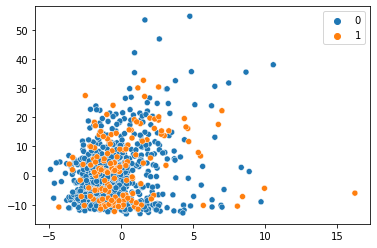

In [173]:
import seaborn as sns
sns.scatterplot(x=X[:,0], y=X[:,1], hue=target_lb)

In [182]:
stacked = np.load('./data_created/free_through_mats_stacked.npy')

In [183]:
sc = StandardScaler()
X = sc.fit_transform(stacked)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

<AxesSubplot:>

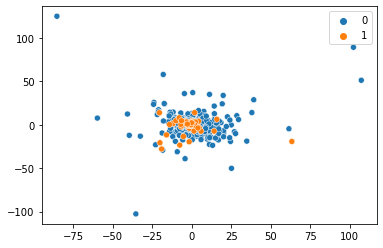

In [185]:
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
target_lb = lb.fit_transform(target).squeeze()


sns.scatterplot(x=X[:,0], y=X[:,1], hue=target_lb)